In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

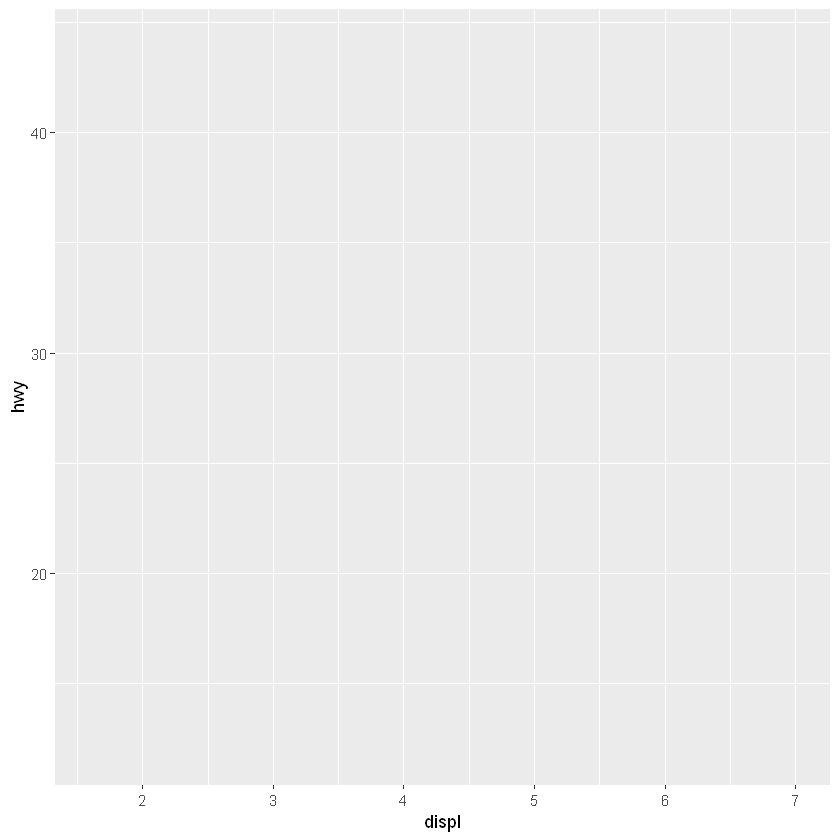

In [2]:
# 1. 배경 설정하기
# x 축 displ, y 축 hwy 로 지정해 배경 생성
ggplot(data = mpg, aes(x = displ, y = hwy))

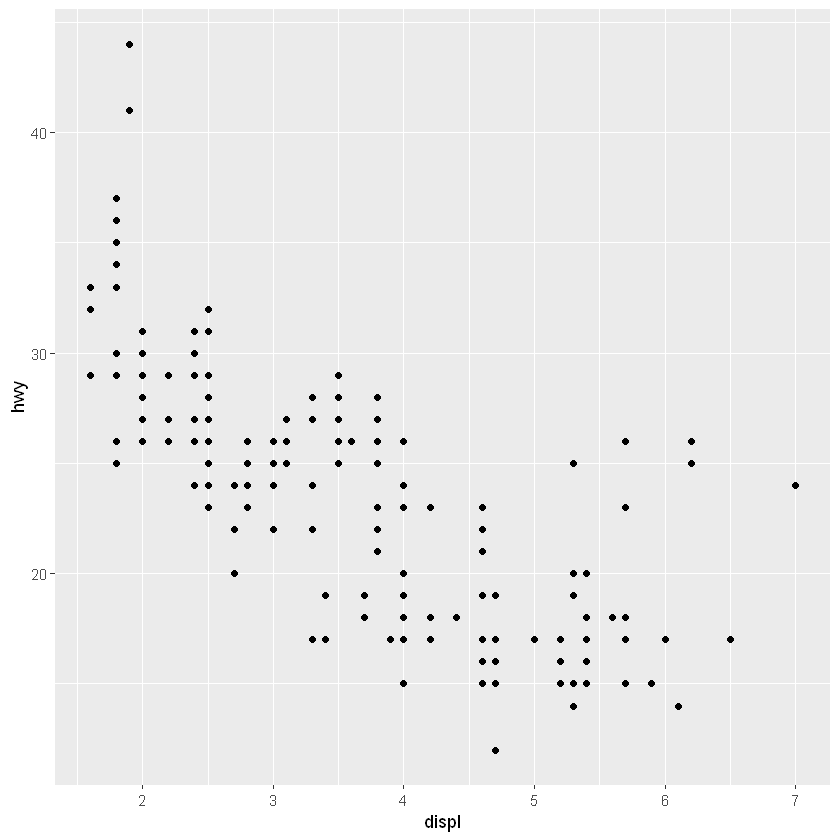

In [3]:
# 2. 그래프 추가하기
# 배경에 산점도 추가
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point()

Warning message:
"Removed 105 rows containing missing values (geom_point)."

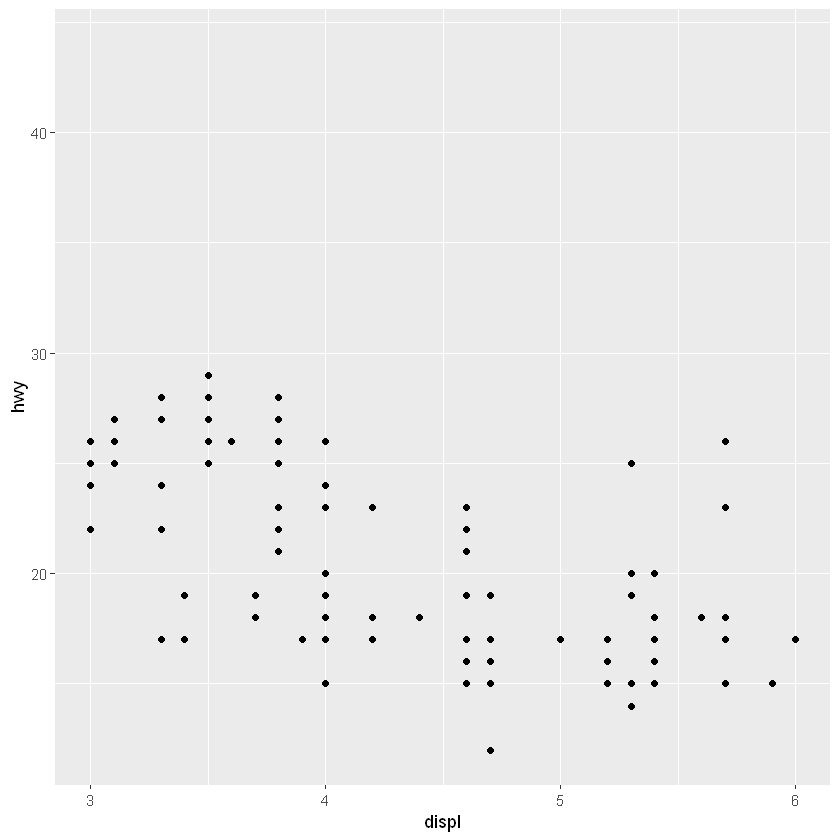

In [6]:
# 3. 축 범위를 조정하는 설정 추가하기
# x 축 범위 3~6 으로 지정
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point() + xlim(3, 6)

Warning message:
"Removed 105 rows containing missing values (geom_point)."

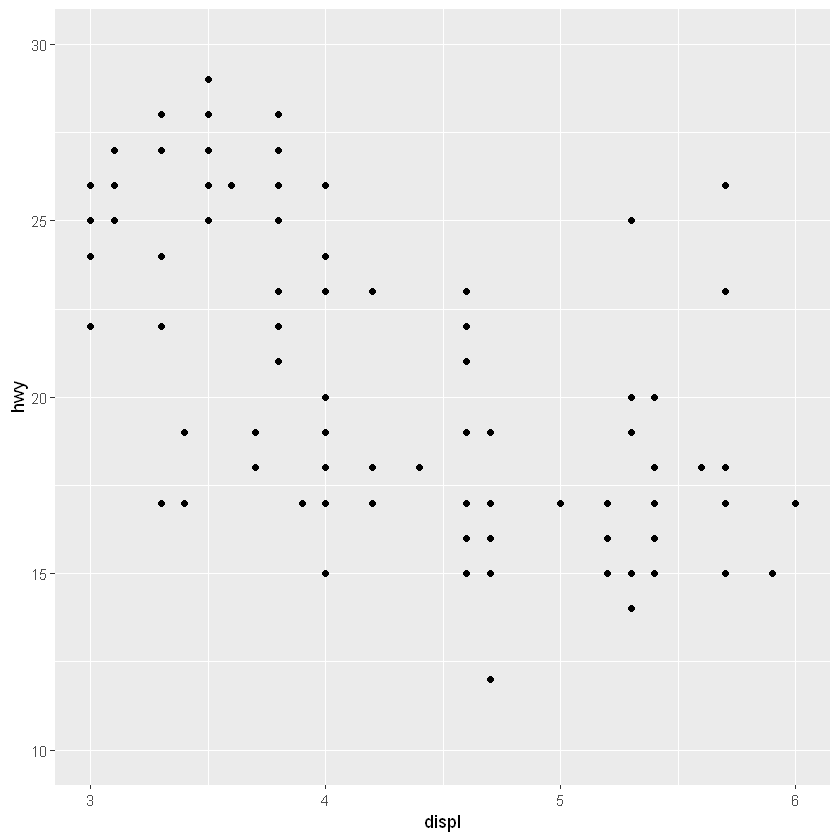

In [7]:
# 3. 축 범위를 조정하는 설정 추가하기
# x 축 범위 3~6, y 축 범위 10~30 으로 지정
ggplot(data = mpg, aes(x = displ, y = hwy)) +
 geom_point() +
 xlim(3, 6) +
 ylim(10, 30)

Warning message:
"Removed 105 rows containing missing values (geom_point)."

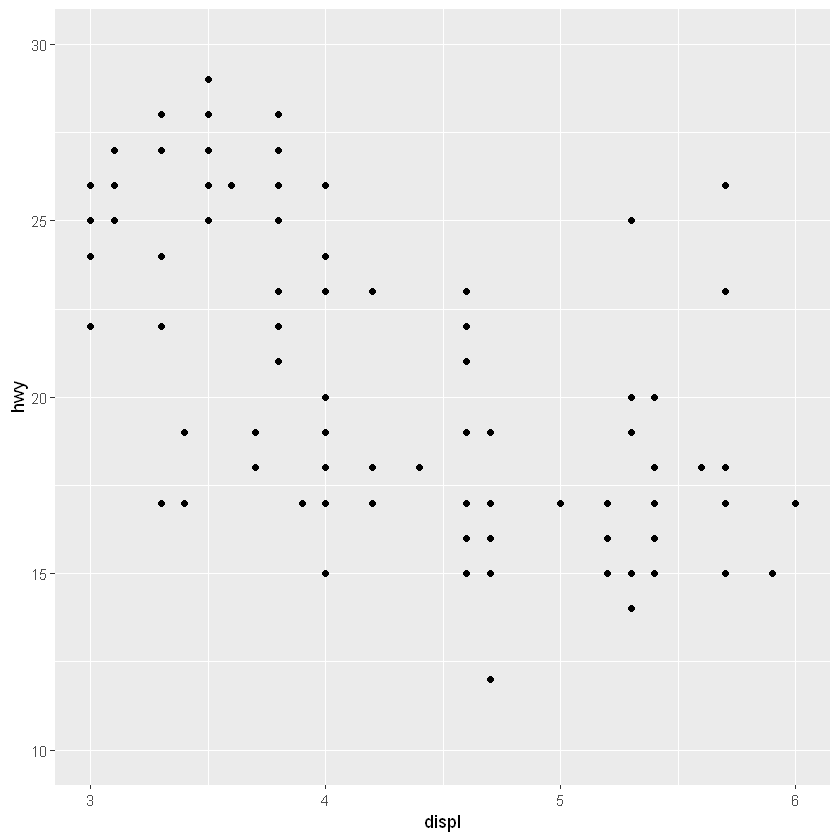

In [9]:
# ggplot2 코드 가독성 높이기
# 한 줄로 작성
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point() + xlim(3, 6) + ylim(10, 30)

Warning message:
"Removed 105 rows containing missing values (geom_point)."

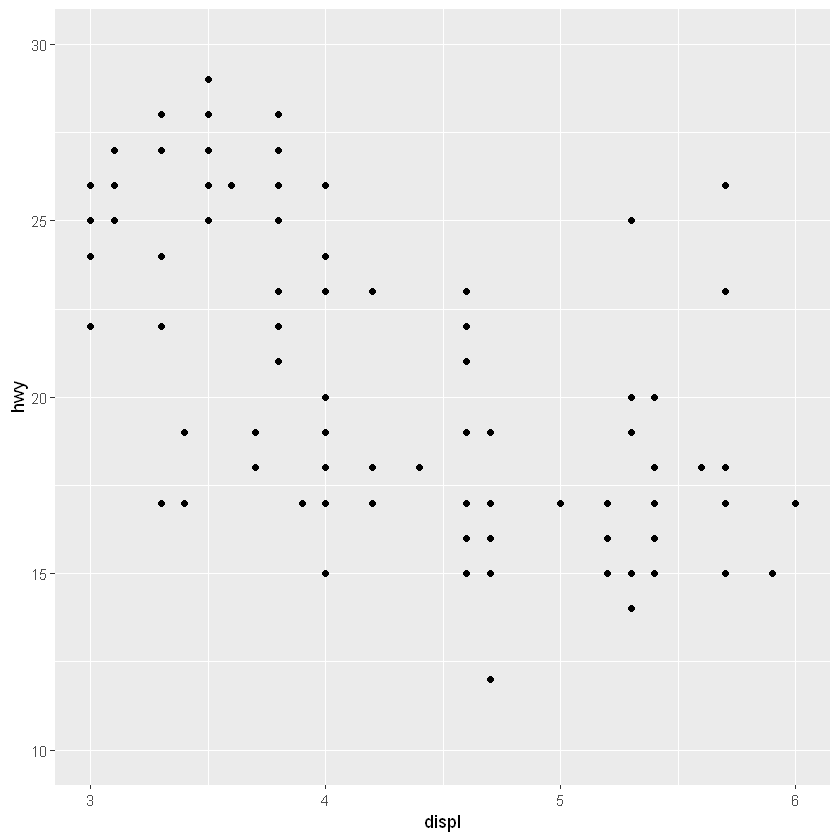

In [10]:
# + 뒤에서 줄 바꾸기
ggplot(data = mpg, aes(x = displ, y = hwy)) +
 geom_point() +
 xlim(3, 6) +
 ylim(10, 30)

ggplot() vs qplot()  
• qplot() : 전처리 단계 데이터 확인용 문법 간단, 기능 단순  
• ggplot() : 최종 보고용. 색, 크기, 폰트 등 세부 조작 가능

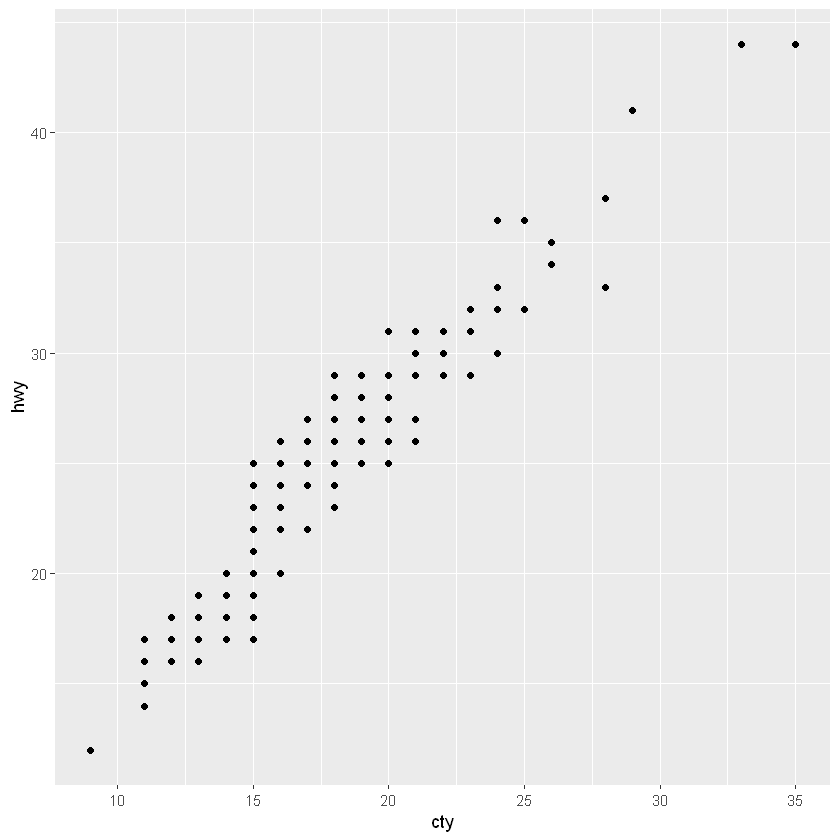

In [11]:
ggplot(data = mpg, aes(x = cty, y = hwy)) + geom_point()

Q2. 미국 지역별 인구통계 정보를 담은 ggplot2 패키지의 midwest 데이터를 이용해서 전체 인구와 아시아인
인구 간에 어떤 관계가 있는지 알아보려고 합니다. x축은 poptotal(전체 인구), y축은 popasian(아시아인
인구)으로 된 산점도를 만들어 보세요. 전체 인구는 50만 명 이하, 아시아인 인구는 1만 명 이하인 지역만
산점도에 표시되게 설정하세요.

Warning message:
"Removed 15 rows containing missing values (geom_point)."

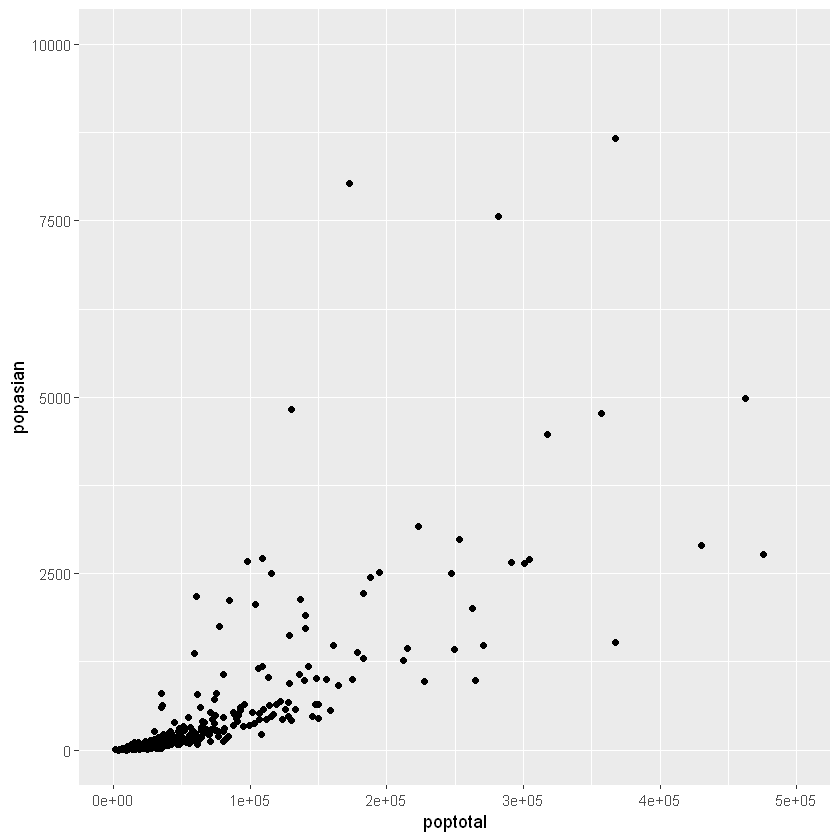

In [12]:
ggplot(data = midwest, aes(x = poptotal, y = popasian)) +
 geom_point() +
 xlim(0, 500000) +
 ylim(0, 10000)

### 참고
• 10만 단위가 넘는 숫자는 지수 표기법(Exponential Notation)에 따라 표현됨  
• 1e+05 = 10만(1 × 10의 5승)  
• 정수로 표현하기 : options(scipen = 99) 실행 후 그래프 생성  
• 지수로 표현하기 : options(scipen = 0) 실행 후 그래프 생성  
• R 스튜디오 재실행시 옵션 원상 복구됨

### 막대 그래프 - 집단 간 차이 표현하기
• 막대 그래프(Bar Chart) : 데이터의 크기를 막대의 길이로 표현한 그래프  
• 성별 소득 차이처럼 집단 간 차이를 표현할 때 주로 사용

In [ ]:
# 막대 그래프 1 - 평균 막대 그래프 만들기
# • 각 집단의 평균값을 막대 길이로 표현한 그래프
# 1. 집단별 평균표 만들기
library(dplyr)
df_mpg <- mpg %>%
 group_by(drv) %>%
 summarise(mean_hwy = mean(hwy))
df_mpg

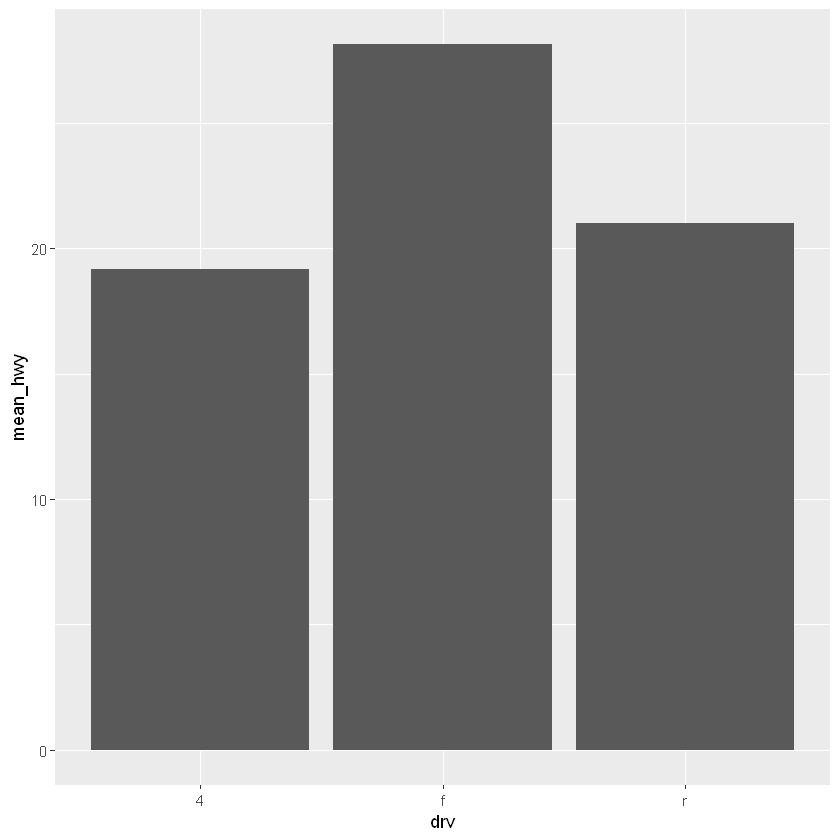

In [12]:
# 2. 그래프 생성하기
ggplot(data = df_mpg, aes(x = drv, y = mean_hwy)) + geom_col()

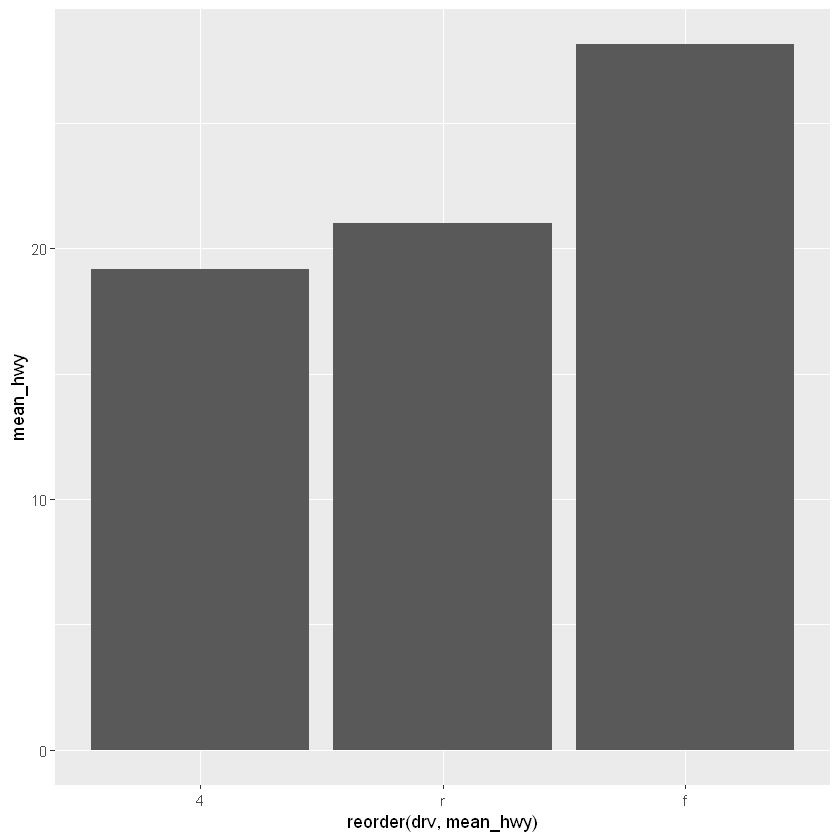

In [14]:
# 3. 크기 순으로 정렬하기
ggplot(data = df_mpg, aes(x = reorder(drv, -mean_hwy), y = mean_hwy)) + geom_col()

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

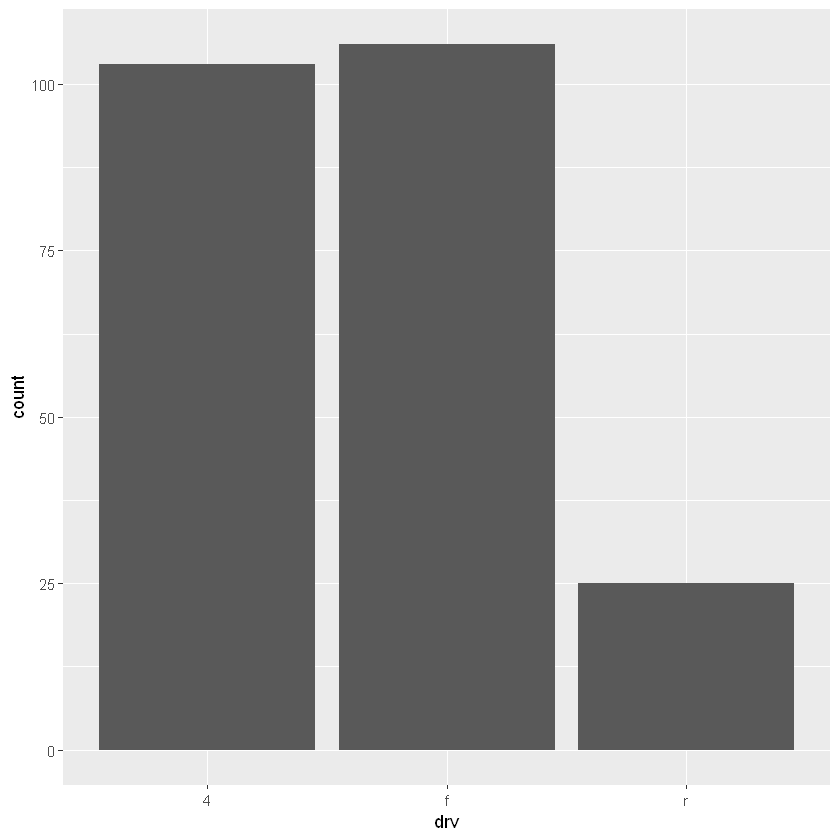

In [14]:
# 막대 그래프 2 - 빈도 막대 그래프
# • 값의 개수(빈도)로 막대의 길이를 표현한 그래프
# x 축 범주 변수, y 축 빈도
ggplot(data = mpg, aes(x = drv)) + geom_bar()

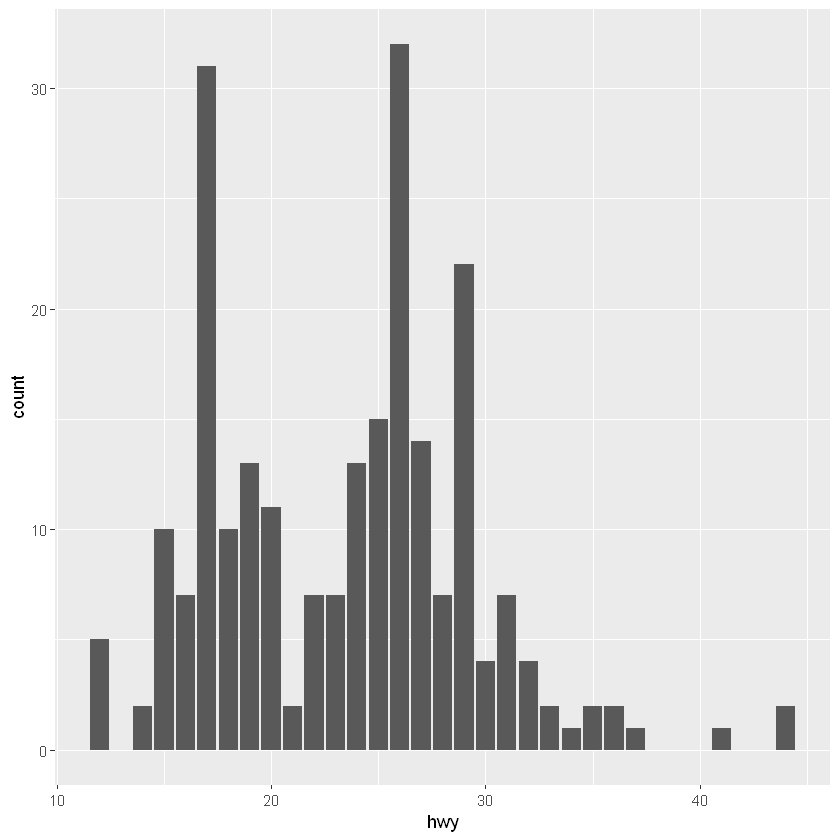

In [15]:
# x 축 연속 변수, y 축 빈도
ggplot(data = mpg, aes(x = hwy)) + geom_bar()

geom_col() VS geom_bar()  
• 평균 막대 그래프 : 데이터를 요약한 평균표를 먼저 만든 후 평균표를 이용해 그래프 생성  
- geom_col()  
• 빈도 막대 그래프 : 별도로 표를 만들지 않고 원자료를 이용해 바로 그래프 생성  
- geom_bar()

Q1. 어떤 회사에서 생산한 "suv" 차종의 도시 연비가 높은지 알아보려고 합니다. "suv" 차종을 대상으로
평균 cty(도시 연비)가 가장 높은 회사 다섯 곳을 막대 그래프로 표현해 보세요. 막대는 연비 가 높은 순으로
정렬하세요.


In [37]:
# 평균 표 생성
df <- mpg %>%
 filter(class == "suv") %>%
 group_by(manufacturer) %>%
 summarise(mean_cty = mean(cty)) %>%
 arrange(desc(mean_cty)) %>%
 head(5)


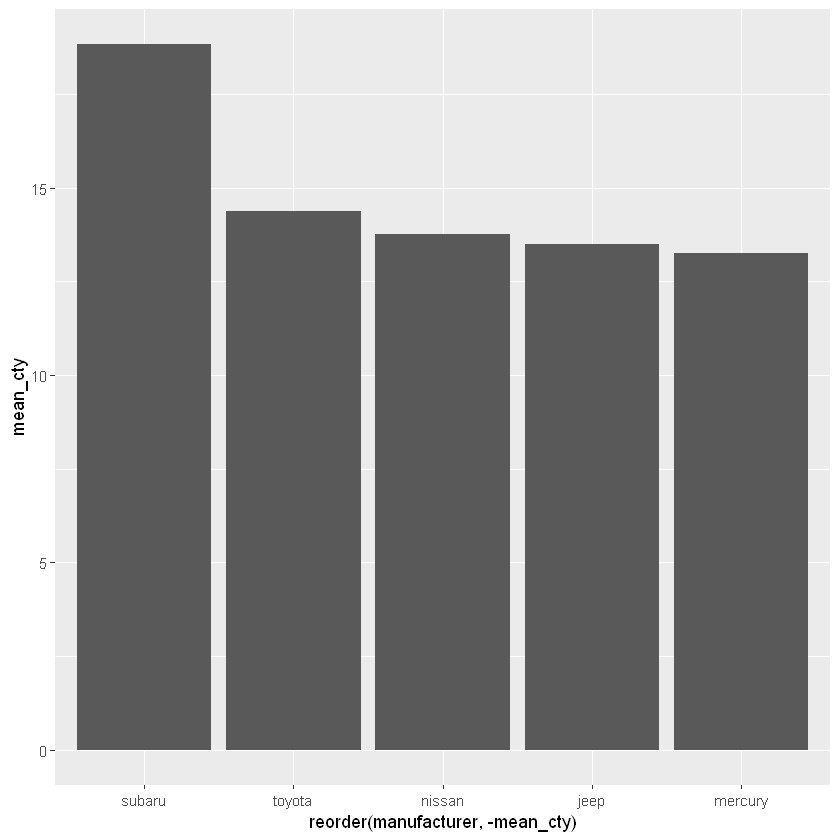

In [38]:
# 그래프 생성
ggplot(data = df, aes(x = reorder(manufacturer, -mean_cty),
 y = mean_cty)) + geom_col()

Q2. 자동차 중에서 어떤 class(자동차 종류)가 가장 많은지 알아보려고 합니다. 자동차 종류별 빈도를 표현한
막대 그래프를 만들어 보세요.

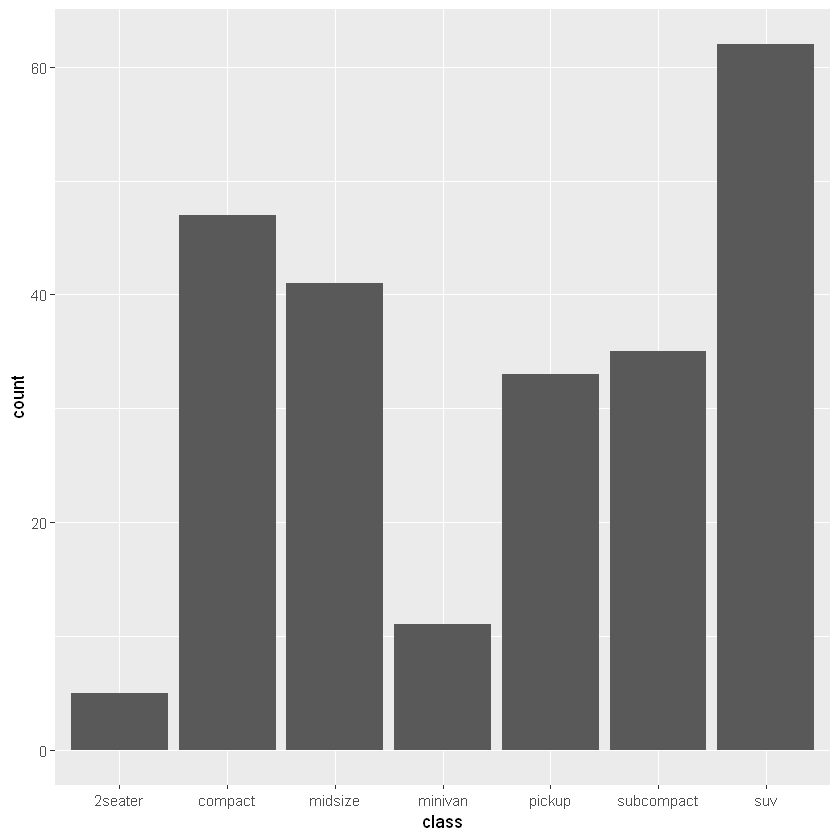

In [39]:
ggplot(data = mpg, aes(x = class)) + geom_bar()

선 그래프 - 시간에 따라 달라지는 데이터 표현하기  
• 선 그래프(Line Chart) : 데이터를 선으로 표현한 그래프  
• 시계열 그래프(Time Series Chart) : 일정 시간 간격을 두고 나열된 시계열 데이터(Time Series Data)를  
선으로 표현한 그래프. 환율, 주가지수 등 경제 지표가 시간에 따라 어떻게 변하는지 표현할 때 활용

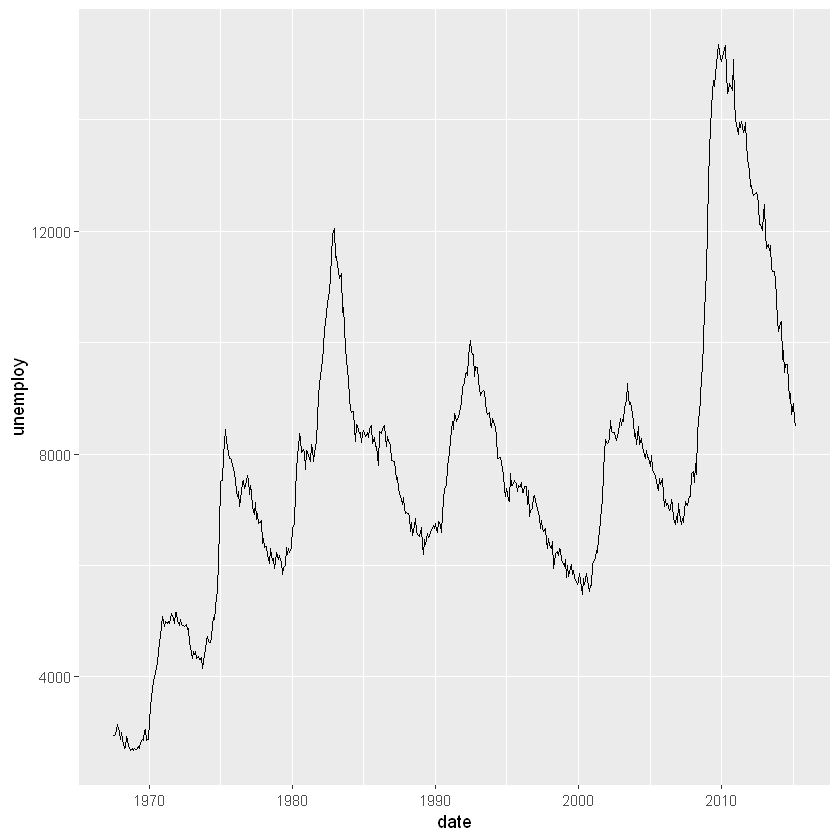

In [40]:
# 시계열 그래프 만들기
ggplot(data = economics, aes(x = date, y = unemploy)) + geom_line()

Q1. psavert(개인 저축률)가 시간에 따라서 어떻게 변해왔는지 알아보려고 합니다. 시간에 따른 개인
저축률의 변화를 나타낸 시계열 그래프를 만들어 보세요

In [41]:
head(economics)
dim(economics)

date,pce,pop,psavert,uempmed,unemploy
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


[1] 574   6

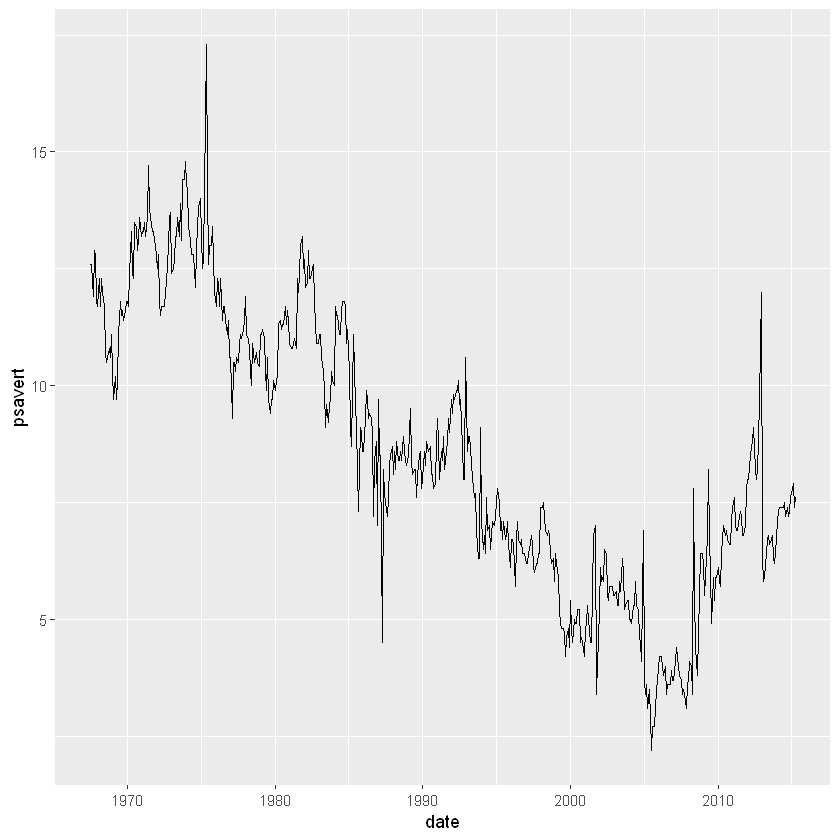

In [20]:
ggplot(data = economics, aes(x = date, y = psavert)) + geom_line()

상자 그림 - 집단 간 분포 차이 표현하기  
• 상자 그림(Box Plot) : 데이터의 분포(퍼져 있는 형태)를 직사각형 상자 모양으로 표현한 그래프  
• 분포를 알 수 있기 때문에 평균만 볼 때보다 데이터의 특성을 좀 더 자세히 이해할 수 있음

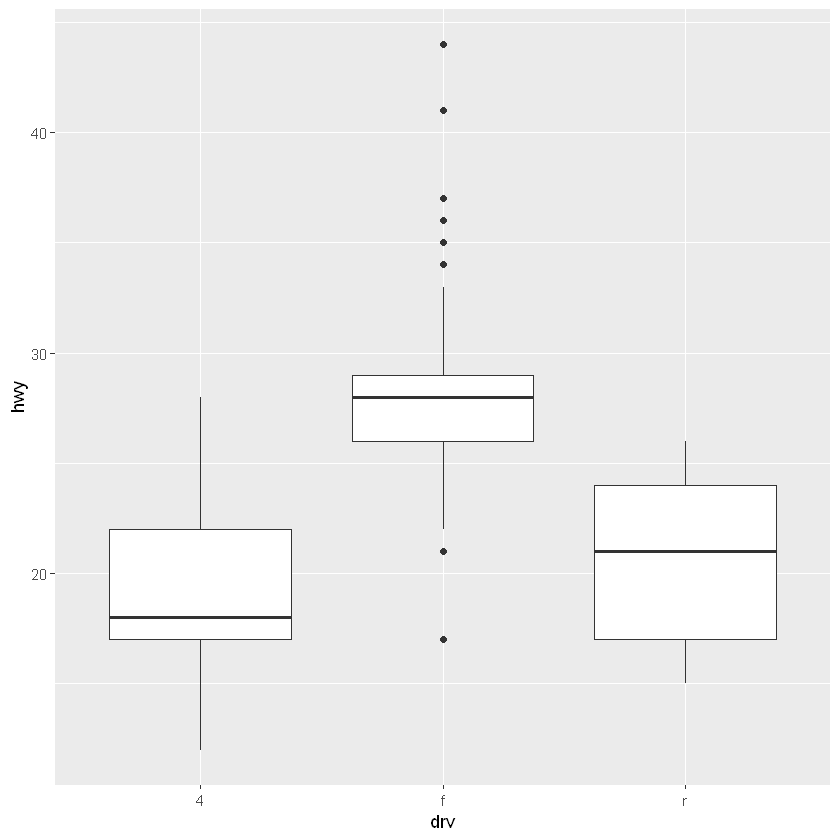

In [42]:
# 상자 그림 만들기
ggplot(data = mpg, aes(x = drv, y = hwy)) + geom_boxplot()

상자 그림 값 설명  
```
상자 아래 세로선 아래 수염 하위 0~%25% 내에 해당하는 값  
상자 밑면 1사분위수(Q1) 하위 25% 위치 값  
상자 내 굵은 선 2사분위수(Q2) 하위 50% 위치 값(중앙값)  
상자 윗면 3사분위수(Q3) 하위 75% 위치 값  
상자 위 세로선 윗수염 하위 75~100% 내에 해당하는 값  
상자 밖 점 표식 극단치 Q1, Q3 밖 1.5 IQR을 벗어난 값  
```
참고 1.5 IQR: 사분위 범위(Q1~Q3간 거리)의 1.5배

Q1. class(자동차 종류)가 "compact", "subcompact", "suv"인 자동차의 cty(도시 연비)가 어떻게 다른지
비교해보려고 합니다. 세 차종의 cty를 나타낸 상자 그림을 만들어보세요

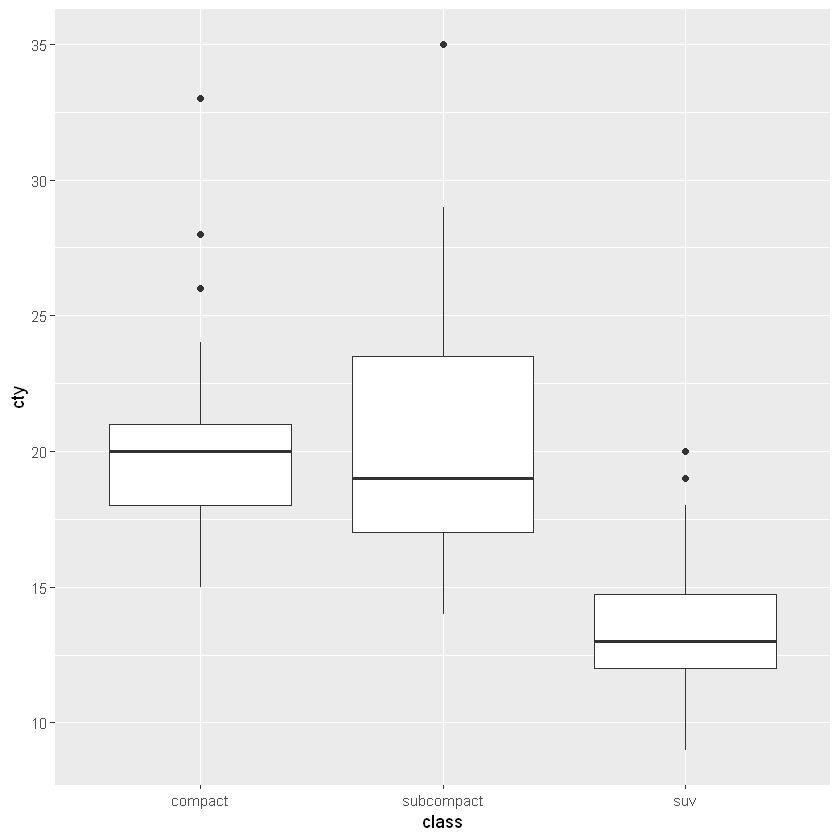

In [22]:
class_mpg <- mpg %>%
 filter(class %in% c("compact", "subcompact", "suv"))

ggplot(data = class_mpg, aes(x = class, y = cty)) + geom_boxplot()

앞에서 다룬 ggplot2 함수들  
값 내용  
geom_point() 산점도  
geom_col() 막대 그래프 - 요약표  
geom_bar() 막대 그래프 - 원자료  
geom_line() 선 그래프  
geom_boxplot() 상자 그림  

## 정리하기
### 1.산점도
```
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point()

# 축 설정 추가
ggplot(data = mpg, aes(x = displ, y = hwy)) +
 geom_point() +
 xlim(3, 6) +
 ylim(10, 30)
```

### 2.평균 막대 그래프
### 1 단계.평균표 만들기
```
df_mpg <- mpg %>%
 group_by(drv) %>%
 summarise(mean_hwy = mean(hwy))
```

### 2 단계.그래프 생성하기, 크기순 정렬하기

```
ggplot(data = df_mpg, aes(x = reorder(drv, -mean_hwy), y = mean_hwy)) + geom_col()
```

### 3.빈도 막대 그래프
```
ggplot(data = mpg, aes(x = drv)) + geom_bar()
```

### 4.선 그래프
```
ggplot(data = economics, aes(x = date, y = unemploy)) + geom_line()
```
### 5.상자 그림
```
ggplot(data = mpg, aes(x = drv, y = hwy)) + geom_boxplot()
```